In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


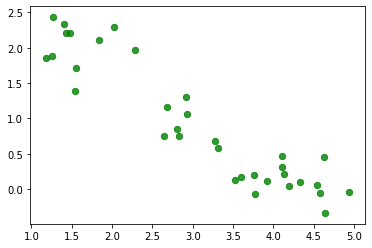

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [11]:
from scipy.spatial import distance

def gradient(X, y, w) -> np.array:
    # Количество элементов обучающей выборки
    n = X.shape[0]
    #прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку
    error = y-y_hat
    # вычисляем градиент
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0/n
    return grad, error

In [7]:
def eval_w_next(X, y, eta, w_current):
    # вычислить градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг
    w_next = w_current - eta*grad
    # условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

In [18]:
def gradient_descent(X, y, eta=0.01, epsilon=0.001):
    m = X.shape[1] # число фичей - это размерность градиента
    w = np.random.random(m).reshape(1,-1) 
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step%100 == 0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w    

In [9]:
X = data.x_train.values.reshape(-1,1)
n = X.shape[0]
# добавим тривиальный признак
X = np.hstack(
    [np.ones(n).reshape(-1,1),
    X
    ])
X.shape

(34, 2)

In [19]:
 w = gradient_descent(X, data.y_train.values.reshape(-1,1), eta=0.0085, epsilon=0.001)

step 100 |w-w_next|=0.00471, grad=[-0.53279987  0.15391528]
step 200 |w-w_next|=0.00383, grad=[-0.43314105  0.12512583]
step 300 |w-w_next|=0.00312, grad=[-0.35212316  0.10172138]
step 400 |w-w_next|=0.00253, grad=[-0.28625945  0.08269466]
step 500 |w-w_next|=0.00206, grad=[-0.23271537  0.06722684]
step 600 |w-w_next|=0.00167, grad=[-0.18918658  0.05465224]
step 700 |w-w_next|=0.00136, grad=[-0.15379973  0.04442968]
step 800 |w-w_next|=0.00111, grad=[-0.12503189  0.03611923]
